<a href="https://colab.research.google.com/github/oluboladedeb/My-portfolio-site/blob/main/Copy_of_Final_Year_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Web Traffic Forecasting Using Machine Learning**

# Web Traffic Forecasting using Machine Learning

## Introduction

In today's digital age, the internet has become an essential platform for businesses, organizations, and individuals to showcase their products, services, and ideas. Understanding web traffic patterns and forecasting future trends is crucial for effective decision-making, resource allocation, and optimizing user experiences. This is where machine learning techniques come into play.

Web traffic forecasting refers to the process of predicting the future number of visitors or page views a website will receive within a specific time frame. Accurate forecasting enables website owners, marketers, and analysts to anticipate demand, plan infrastructure scaling, allocate advertising budgets efficiently, and optimize content delivery.

Machine learning, a subset of artificial intelligence, offers powerful tools and algorithms for web traffic forecasting. By leveraging historical traffic data and various features such as time of day, day of the week, seasonality, and external factors, machine learning models can capture complex patterns and make accurate predictions.

## Objective

The main objective of this project is to develop a machine learning model that can accurately forecast web traffic based on historical data and relevant features. The model will be trained on a dataset containing web traffic information, such as the number of visits or page views, collected over a specific period. Once trained, the model will be able to predict future web traffic based on input features, allowing users to plan and make informed decisions.

## Methodology

The project will follow the following methodology:

1. Data Collection: Collecting a comprehensive dataset containing historical web traffic information, including time-series data and relevant features such as time of day, day of the week, and seasonality. This dataset will serve as the foundation for training and evaluating the machine learning models.

2. Data Preprocessing: Exploring and analyzing the collected dataset, performing data cleaning, handling missing values, and transforming the data into a suitable format for training the machine learning models. This step may involve feature engineering to extract meaningful patterns and relationships from the data.

3. Model Selection: Evaluating and selecting appropriate machine learning algorithms for web traffic forecasting. Various models such as linear regression, decision trees, random forests, and neural networks will be considered based on their ability to handle time-series data and capture complex patterns.

4. Model Training and Evaluation: Splitting the dataset into training and testing sets, training the selected machine learning models on the training data, and evaluating their performance on the testing data. Evaluation metrics such as mean absolute error (MAE), root mean square error (RMSE), and R-squared will be used to assess the models' accuracy and performance.

5. Model Optimization: Fine-tuning the selected model's hyperparameters to improve its forecasting accuracy. Techniques such as grid search or Bayesian optimization can be employed to find the optimal combination of hyperparameters.

6. Web Traffic Forecasting: Once the model is trained and optimized, it will be deployed to make predictions on unseen data. Users will be able to input relevant features, and the model will provide accurate forecasts of web traffic.

## Expected Outcomes

By the completion of this project, we expect to achieve the following outcomes:

1. A comprehensive understanding of web traffic forecasting using machine learning techniques.
2. An optimized machine learning model capable of accurately forecasting web traffic based on historical data and relevant features.
3. Insights into the key factors influencing web traffic patterns and trends.
4. An evaluation of the model's performance using appropriate metrics.
5. Practical implications and recommendations for website owners, marketers, and analysts regarding web traffic management and resource allocation.

Web traffic forecasting using machine learning has significant potential to enhance decision-making, optimize resource allocation, and improve user experiences. By accurately predicting web traffic, businesses and organizations can proactively respond to changing demands, plan infrastructure scaling effectively, and allocate advertising budgets efficiently.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU, SimpleRNN, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import Adam



#Loading the dataset


In [2]:
dataset_path = "sample_data/Estore1.csv"


In [3]:
df = pd.read_csv('sample_data/Estore1.csv')




In [5]:
df.head(10)

,Date,Time,Visitors,Page Views,Transactions,Seasonality,Notable Events
0,01/01/2023,12:30:00,1000,5000,50,Winter,New Collection
1,02/01/2023,13:30:00,1200,5200,55,Summer,Sale
2,03/01/2023,09:00:00,900,4800,45,Summer,Sale
3,04/01/2023,11:00:00,1100,5100,52,Winter,Sale
4,05/01/2023,15:00:00,950,4700,48,Winter,Sale
5,06/01/2023,19:30:00,1150,5300,54,Winter,NaN
6,07/01/2023,19:30:00,1050,4900,50,Spring,New Collection
7,08/01/2023,17:00:00,950,4600,45,Summer,New Collection
8,09/01/2023,19:00:00,1050,5100,51,Spring,NaN
9,10/01/2023,15:30:00,1000,4800,48,Winter,Sale


In [6]:
df.tail (180)

,Date,Time,Visitors,Page Views,Transactions,Seasonality,Notable Events
1,02/01/2023,13:30:00,1200,5200,55,Summer,Sale
2,03/01/2023,09:00:00,900,4800,45,Summer,Sale
3,04/01/2023,11:00:00,1100,5100,52,Winter,Sale
4,05/01/2023,15:00:00,950,4700,48,Winter,Sale
5,06/01/2023,19:30:00,1150,5300,54,Winter,NaN
...,...,...,...,...,...,...,...
176,26/06/2023,20:00:00,1000,4800,49,Summer,New Collection
177,27/06/2023,08:00:00,900,4500,46,Summer,New Collection
178,28/06/2023,20:00:00,950,4800,48,Spring,Sale
179,29/06/2023,18:30:00,1100,5200,53,Winter,New Collection


In [7]:
df.shape

(181, 7)

In [8]:
df.columns.values

array(['Date        ', 'Time', 'Visitors', ' Page Views', ' Transactions',
       'Seasonality', 'Notable Events'], dtype=object)

#Statistical Information


In [9]:
df.describe().astype(int)

,Visitors,Page Views,Transactions
count,181,181,181
mean,1093,5172,54
std,128,408,34
min,900,4400,44
25%,1000,4800,48
50%,1100,5200,53
75%,1200,5500,56
max,1300,5900,510


In [10]:
df.dtypes

Date              object
Time              object
Visitors           int64
 Page Views        int64
 Transactions      int64
Seasonality       object
Notable Events    object
dtype: object

#Data Cleaning

In [11]:
# Checking for Missing Values
df.isnull().sum()

Date               0
Time               0
Visitors           0
 Page Views        0
 Transactions      0
Seasonality        0
Notable Events    56
dtype: int64

Here there are no missing values in date, time, seasonality,web traffic, feature 1 and feature 2. However, there are 56 missing values in notable events column which must be fixed.

In [12]:
  #  Create a missing value indicator for 'Notable Events'.

In [13]:
desired_value = 'unknown'
df['Notable Events'] = df['Notable Events'].fillna(desired_value)

In [14]:
df.isnull().sum()

Date              0
Time              0
Visitors          0
 Page Views       0
 Transactions     0
Seasonality       0
Notable Events    0
dtype: int64

Missing values have been handled by input '-' where 'NaN' is shown in the notable events column. Here there's no longer any missing values

Check Missing Values

In [15]:
df.isnull().sum()

Date              0
Time              0
Visitors          0
 Page Views       0
 Transactions     0
Seasonality       0
Notable Events    0
dtype: int64

#Visualising Missing Data

In [16]:
df.shape

(181, 7)

In [19]:
# Visualize missing data
df.isnull.matrix(df)

AttributeError: ignored

# Exploratory Data Analysis

In [21]:
#Counting transaction types
df.groupby('Visitors').count()

,Date,Time,Page Views,Transactions,Seasonality,Notable Events
Visitors,,,,,,
900,20,20,20,20,20,20
950,23,23,23,23,23,23
1000,20,20,20,20,20,20
1050,22,22,22,22,22,22
1100,18,18,18,18,18,18
1150,23,23,23,23,23,23
1200,18,18,18,18,18,18
1250,18,18,18,18,18,18
1300,19,19,19,19,19,19


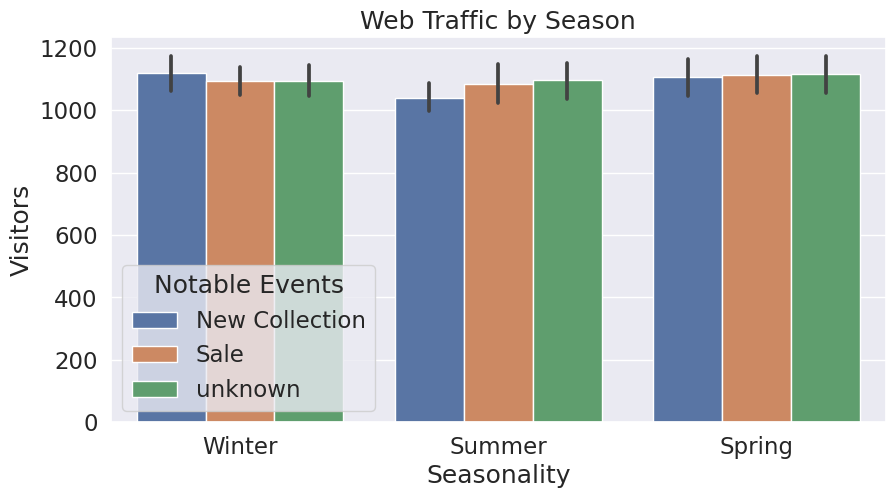

In [27]:
# observing web visits by Seasonality
sns.set_theme(font_scale=1.5)
plt.figure(figsize=(10, 5))
sns.barplot(x='Seasonality', y='Visitors', hue='Notable Events', data=df).set_title("Web Traffic by Season")

plt.show()


Text(0.5, 1.0, 'Web Traffic by Notable Events')

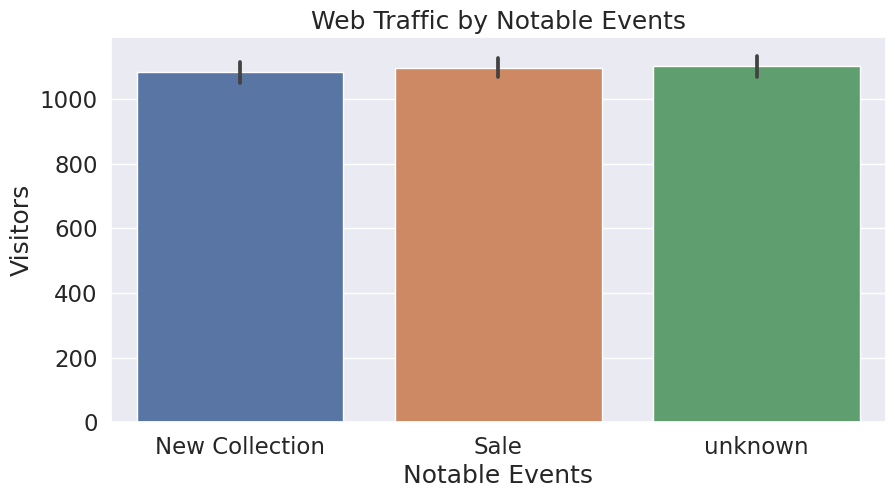

In [29]:
# Observing web visits by notable events
plt.figure(figsize=(10,5))
sns.barplot(x='Notable Events',y='Visitors',data=df).set_title("Web Traffic by Notable Events")

#Data Preprocessing


In [30]:
# Encode categorical variables "Seasonality" and "Notable Events"
label_encoder = LabelEncoder()
df["Seasonality"] = label_encoder.fit_transform(df["Seasonality"])
df["Notable Events"] = label_encoder.fit_transform(df["Notable Events"])

In [34]:
# Assuming X contains the relevant input features and y contains the target variable ("Web Traffic (Number of Visits)")
X = df[["Seasonality", "Notable Events", "Page Views", "Time"]].values
y = df["Visitors"].values


KeyError: ignored

#Training and preprocessing deep learning models

In [ ]:
# Implement and train the LSTM model
# Initialize and train the LSTM model
model_LSTM = Sequential()
model_LSTM.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model_LSTM.add(Dense(32, activation='relu'))
model_LSTM.add(Dense(1))
model_LSTM.compile(loss='mean_squared_error', optimizer='adam')
model_LSTM.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)